In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 추출

In [2]:
# S3 엑셀 데이터 추출

files = glob.glob('./S3/*.xls')

all_data = pd.DataFrame()
for f in files:
    data = pd.read_csv(f, encoding='euc-kr', header=0, sep='\t')
    
    df = pd.DataFrame(data)
    
    all_data = all_data.append(df, ignore_index=True)
    print(f, all_data.shape)
all_data


./S3\2020-06-11 12시 08분 35초.xls (94, 127)
./S3\2020-06-11 13시 44분 04초.xls (97, 127)
./S3\2020-06-11 13시 45분 57초.xls (101, 127)
./S3\2020-06-11 13시 56분 03초.xls (103, 127)
./S3\2020-06-11 13시 58분 23초.xls (705, 127)
./S3\2020-06-12 00시 00분 07초.xls (2145, 127)
./S3\2020-06-13 00시 00분 07초.xls (3585, 127)
./S3\2020-06-14 00시 00분 06초.xls (5025, 127)
./S3\2020-06-15 00시 00분 06초.xls (6465, 127)
./S3\2020-06-16 00시 00분 05초.xls (7905, 127)
./S3\2020-06-17 00시 00분 05초.xls (8566, 127)
./S3\타운_2020-06-17 11시 03분 47초.xls (8567, 127)
./S3\타운_2020-06-17 11시 04분 04초.xls (8620, 127)
./S3\타운_2020-06-17 11시 56분 28초.xls (9344, 127)
./S3\타운_2020-06-18 00시 00분 03초.xls (10784, 127)
./S3\타운_2020-06-19 00시 00분 03초.xls (12224, 127)
./S3\타운_2020-06-20 00시 00분 03초.xls (13664, 127)
./S3\타운_2020-06-21 00시 00분 02초.xls (15104, 127)
./S3\타운_2020-06-22 00시 00분 02초.xls (16544, 127)
./S3\타운_2020-06-23 00시 00분 01초.xls (17984, 127)
./S3\타운_2020-06-24 00시 00분 01초.xls (19424, 127)
./S3\타운_2020-06-25 00시 00분 00초.xls (20864, 127

./S3\타운_2020-12-21 00시 00분 14초.xls (205773, 127)
./S3\타운_2020-12-22 00시 00분 13초.xls (207213, 127)
./S3\타운_2020-12-23 00시 00분 11초.xls (208653, 127)
./S3\타운_2020-12-24 00시 00분 10초.xls (210093, 127)
./S3\타운_2020-12-25 00시 00분 09초.xls (211533, 127)
./S3\타운_2020-12-26 00시 00분 08초.xls (212973, 127)
./S3\타운_2020-12-27 00시 00분 06초.xls (214413, 127)
./S3\타운_2020-12-28 00시 00분 05초.xls (215853, 127)
./S3\타운_2020-12-29 00시 00분 05초.xls (217293, 127)
./S3\타운_2020-12-30 00시 00분 04초.xls (218733, 127)
./S3\타운_2020-12-31 00시 00분 03초.xls (220173, 127)
./S3\타운_2021-01-01 00시 00분 01초.xls (221613, 127)
./S3\타운_2021-01-02 00시 00분 00초.xls (223054, 127)
./S3\타운_2021-01-03 00시 00분 59초.xls (224494, 127)
./S3\타운_2021-01-04 00시 00분 57초.xls (225934, 127)
./S3\타운_2021-01-05 00시 00분 56초.xls (227374, 127)
./S3\타운_2021-01-06 00시 00분 55초.xls (228814, 127)
./S3\타운_2021-01-07 00시 00분 54초.xls (230254, 127)
./S3\타운_2021-01-08 00시 00분 52초.xls (231694, 127)
./S3\타운_2021-01-09 00시 00분 51초.xls (233134, 127)
./S3\타운_2021-01-10 0

./S3\타운_2021-03-25 15시 39분 25초.xls (335121, 127)
./S3\타운_2021-03-25 16시 52분 55초.xls (335549, 127)
./S3\타운_2021-03-26 00시 00분 02초.xls (336989, 127)
./S3\타운_2021-03-27 00시 00분 02초.xls (338430, 127)
./S3\타운_2021-03-28 00시 01분 00초.xls (339870, 127)
./S3\타운_2021-03-29 00시 00분 58초.xls (341310, 127)
./S3\타운_2021-03-30 00시 00분 57초.xls (341974, 127)
./S3\타운_2021-03-30 11시 32분 29초.xls (341980, 127)
./S3\타운_2021-03-30 11시 38분 18초.xls (342723, 127)
./S3\타운_2021-03-31 00시 00분 32초.xls (344163, 127)
./S3\타운_2021-04-01 00시 00분 30초.xls (345603, 127)
./S3\타운_2021-04-02 00시 00분 28초.xls (347043, 127)
./S3\타운_2021-04-03 00시 00분 27초.xls (348483, 127)
./S3\타운_2021-04-04 00시 00분 25초.xls (349923, 127)
./S3\타운_2021-04-05 00시 00분 23초.xls (351363, 127)
./S3\타운_2021-04-06 00시 00분 21초.xls (352803, 127)
./S3\타운_2021-04-07 00시 00분 19초.xls (354243, 127)
./S3\타운_2021-04-08 00시 00분 17초.xls (355683, 127)
./S3\타운_2021-04-09 00시 00분 15초.xls (357123, 127)
./S3\타운_2021-04-10 00시 00분 13초.xls (358563, 127)
./S3\타운_2021-04-11 0

,Time,1.TB1메인(W),1.TB1메인(kWh),2.TB1실험1(W),2.TB1실험1(kWh),3.TB1실험2(W),3.TB1실험2(kWh),4.TB1실험3(W),4.TB1실험3(kWh),5.TB1조명(W),...,60-TB1PB1(W),60-TB1PB1(kWh),61-TB1급탕(W),61-TB1급탕(kWh),62-TB1102(W),62-TB1102(kWh),63-TB1103F(W),63-TB1103(kWh),12.T1F냉난방기(W),12.T1F냉난방기(kWh)
0,2020-06-11 오후 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-06-11 오후 12:09:06,1744.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,727.0,16176.9,69.0,1353.2,2450.2,NaN,NaN,NaN
2,2020-06-11 오후 12:10:06,1750.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,730.0,16176.9,70.0,1353.2,2450.2,NaN,NaN,NaN
3,2020-06-11 오후 12:11:06,1749.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,729.0,16177.0,70.0,1353.2,2450.2,NaN,NaN,NaN
4,2020-06-11 오후 12:12:06,1752.0,451.3,873.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,731.0,16177.0,68.0,1353.2,2450.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474557,2021-07-01 13:00:10,749.0,12826.3,21.0,2548.3,153.0,1592.6,153.0,1597.4,220.0,...,0.0,33068.6,722.0,32756.4,692.0,10920.3,363.0,9475.3,4833.0,15867.0
474558,2021-07-01 13:01:10,749.0,12826.3,24.0,2548.3,153.0,1592.6,156.0,1597.4,220.0,...,0.0,33068.6,722.0,32756.5,643.0,10920.4,366.0,9475.3,4499.0,15867.1
474559,2021-07-01 13:02:10,746.0,12826.3,21.0,2548.3,153.0,1592.6,153.0,1597.4,220.0,...,0.0,33068.6,723.0,32756.5,640.0,10920.4,366.0,9475.3,4608.0,15867.2
474560,2021-07-01 13:03:10,746.0,12826.3,23.0,2548.3,153.0,1592.6,153.0,1597.4,218.0,...,0.0,33068.6,721.0,32756.5,710.0,10920.4,367.0,9475.3,4703.0,15867.3


In [3]:
# Time 컬럼에서 오전, 오후 한글은 pd.to_date 적용 불가 AM, PM으로 각각 변경

all_data['Time'] = all_data['Time'].replace({'오전': 'AM', '오후':'PM'}, regex=True)

In [4]:
# Time 컬럼 내 시각형식 다른 두 컬럼 분리 

all_data_1 = all_data.iloc[0:372565,:]
all_data_2 = all_data.iloc[372565:, :]

In [5]:
# all_data_2는 포맷변경 없이 바로 적용 가능

all_data_2['Time']= pd.to_datetime(all_data_2['Time'])
all_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101997 entries, 372565 to 474561
Columns: 129 entries, Time to 12.T1F냉난방기(kWh)
dtypes: datetime64[ns](1), float64(128)
memory usage: 100.4 MB


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
all_data_2.head()

,Time,1.TB1메인(W),1.TB1메인(kWh),2.TB1실험1(W),2.TB1실험1(kWh),3.TB1실험2(W),3.TB1실험2(kWh),4.TB1실험3(W),4.TB1실험3(kWh),5.TB1조명(W),...,60-TB1PB1(W),60-TB1PB1(kWh),61-TB1급탕(W),61-TB1급탕(kWh),62-TB1102(W),62-TB1102(kWh),63-TB1103F(W),63-TB1103(kWh),12.T1F냉난방기(W),12.T1F냉난방기(kWh)
372565,2021-04-20 17:45:57,705.0,10947.8,24.0,2279.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
372566,2021-04-20 17:46:56,712.0,10947.8,24.0,2279.0,144.0,1358.0,144.0,1361.8,223.0,...,0.0,33068.6,729.0,30073.4,1742.0,10108.8,51.0,9328.7,NaN,NaN
372567,2021-04-20 17:47:56,682.0,10947.8,21.0,2279.0,127.0,1358.0,127.0,1361.8,220.0,...,0.0,33068.6,728.0,30073.5,1940.0,10108.8,48.0,9328.7,NaN,NaN
372568,2021-04-20 17:48:56,754.0,10947.8,24.0,2279.0,156.0,1358.0,156.0,1361.8,220.0,...,0.0,33068.6,728.0,30073.5,158.0,10108.8,44.0,9328.7,NaN,NaN
372569,2021-04-20 17:50:16,696.0,10947.8,24.0,2279.0,127.0,1358.0,129.0,1361.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [7]:
# all_data_1는 포맷변경 적용 필요

all_data_1['Time']= pd.to_datetime(all_data_1['Time'], format = "%Y-%m-%d %p %I:%M:%S")

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
all_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372565 entries, 0 to 372564
Columns: 129 entries, Time to 12.T1F냉난방기(kWh)
dtypes: datetime64[ns](1), float64(128)
memory usage: 366.7 MB


In [9]:
all_data_1.head()

,Time,1.TB1메인(W),1.TB1메인(kWh),2.TB1실험1(W),2.TB1실험1(kWh),3.TB1실험2(W),3.TB1실험2(kWh),4.TB1실험3(W),4.TB1실험3(kWh),5.TB1조명(W),...,60-TB1PB1(W),60-TB1PB1(kWh),61-TB1급탕(W),61-TB1급탕(kWh),62-TB1102(W),62-TB1102(kWh),63-TB1103F(W),63-TB1103(kWh),12.T1F냉난방기(W),12.T1F냉난방기(kWh)
0,2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-06-11 12:09:06,1744.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,727.0,16176.9,69.0,1353.2,2450.2,NaN,NaN,NaN
2,2020-06-11 12:10:06,1750.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,730.0,16176.9,70.0,1353.2,2450.2,NaN,NaN,NaN
3,2020-06-11 12:11:06,1749.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,729.0,16177.0,70.0,1353.2,2450.2,NaN,NaN,NaN
4,2020-06-11 12:12:06,1752.0,451.3,873.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,731.0,16177.0,68.0,1353.2,2450.3,NaN,NaN,NaN


In [10]:
# Time 컬럼 포맷 변경 후 다시 concat
all_data_3 = pd.concat([all_data_1, all_data_2])
all_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474562 entries, 0 to 474561
Columns: 129 entries, Time to 12.T1F냉난방기(kWh)
dtypes: datetime64[ns](1), float64(128)
memory usage: 467.1 MB


In [11]:
all_data_3

,Time,1.TB1메인(W),1.TB1메인(kWh),2.TB1실험1(W),2.TB1실험1(kWh),3.TB1실험2(W),3.TB1실험2(kWh),4.TB1실험3(W),4.TB1실험3(kWh),5.TB1조명(W),...,60-TB1PB1(W),60-TB1PB1(kWh),61-TB1급탕(W),61-TB1급탕(kWh),62-TB1102(W),62-TB1102(kWh),63-TB1103F(W),63-TB1103(kWh),12.T1F냉난방기(W),12.T1F냉난방기(kWh)
0,2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-06-11 12:09:06,1744.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,727.0,16176.9,69.0,1353.2,2450.2,NaN,NaN,NaN
2,2020-06-11 12:10:06,1750.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,...,0.0,33068.6,730.0,16176.9,70.0,1353.2,2450.2,NaN,NaN,NaN
3,2020-06-11 12:11:06,1749.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,729.0,16177.0,70.0,1353.2,2450.2,NaN,NaN,NaN
4,2020-06-11 12:12:06,1752.0,451.3,873.0,184.7,0.0,0.2,0.0,0.0,542.0,...,0.0,33068.6,731.0,16177.0,68.0,1353.2,2450.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474557,2021-07-01 13:00:10,749.0,12826.3,21.0,2548.3,153.0,1592.6,153.0,1597.4,220.0,...,0.0,33068.6,722.0,32756.4,692.0,10920.3,363.0,9475.3,4833.0,15867.0
474558,2021-07-01 13:01:10,749.0,12826.3,24.0,2548.3,153.0,1592.6,156.0,1597.4,220.0,...,0.0,33068.6,722.0,32756.5,643.0,10920.4,366.0,9475.3,4499.0,15867.1
474559,2021-07-01 13:02:10,746.0,12826.3,21.0,2548.3,153.0,1592.6,153.0,1597.4,220.0,...,0.0,33068.6,723.0,32756.5,640.0,10920.4,366.0,9475.3,4608.0,15867.2
474560,2021-07-01 13:03:10,746.0,12826.3,23.0,2548.3,153.0,1592.6,153.0,1597.4,218.0,...,0.0,33068.6,721.0,32756.5,710.0,10920.4,367.0,9475.3,4703.0,15867.3


In [12]:
# 데이터프레임 저장
all_data_3.to_csv('./S3_concat.csv', encoding='euc=kr')

# 합쳐진 데이터 로드

In [13]:
df = pd.read_csv('./S3_concat.csv', encoding='euc-kr', parse_dates = True, index_col = 'Time')

In [14]:
df.drop(['Unnamed: 0'], inplace = True, axis =1 )
df.head()

,1.TB1메인(W),1.TB1메인(kWh),2.TB1실험1(W),2.TB1실험1(kWh),3.TB1실험2(W),3.TB1실험2(kWh),4.TB1실험3(W),4.TB1실험3(kWh),5.TB1조명(W),5.TB1조명(kWh),...,60-TB1PB1(W),60-TB1PB1(kWh),61-TB1급탕(W),61-TB1급탕(kWh),62-TB1102(W),62-TB1102(kWh),63-TB1103F(W),63-TB1103(kWh),12.T1F냉난방기(W),12.T1F냉난방기(kWh)
Time,,,,,,,,,,,,,,,,,,,,,
2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-06-11 12:09:06,1744.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,86.7,...,0.0,33068.6,727.0,16176.9,69.0,1353.2,2450.2,NaN,NaN,NaN
2020-06-11 12:10:06,1750.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,540.0,86.7,...,0.0,33068.6,730.0,16176.9,70.0,1353.2,2450.2,NaN,NaN,NaN
2020-06-11 12:11:06,1749.0,451.2,871.0,184.7,0.0,0.2,0.0,0.0,542.0,86.7,...,0.0,33068.6,729.0,16177.0,70.0,1353.2,2450.2,NaN,NaN,NaN
2020-06-11 12:12:06,1752.0,451.3,873.0,184.7,0.0,0.2,0.0,0.0,542.0,86.8,...,0.0,33068.6,731.0,16177.0,68.0,1353.2,2450.3,NaN,NaN,NaN


# 데이터 분석

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


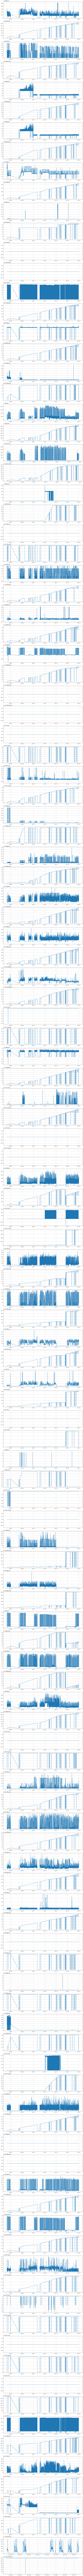

In [24]:
# 시간별 데이터 분석
fig, ax = plt.subplots(figsize=(18,600))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])    
    plt.title(name, loc = 'left', pad=5)   
    plt.yticks()
    plt.grid(True)
plt.show()
fig.tight_layout()

In [1]:
df.describe()

NameError: name 'df' is not defined